# Medical Appointment

### A person makes a doctor's appointment, receives all the instructions, and no-show. Who to blame?

In this notebook we will try to analyze why would some patient not show up for his medical appointment and whether there are reasons for that using the data we have.

We will try to find some correlation between the different attributes we have and whether the patient shows up or not. The dataset we are going to use contains 110.527 medical appointments and its 14 associated variables:
* PatientId
* AppointmentID
* Gender
* ScheduledDay
* AppointmentDay
* Age
* Neighbourhood
* Scholarship
* Hypertension
* Diabetes
* Alcoholism
* Handcap
* SMS_received
* No-show


### Questions to answer

*   What is the percentage of no-show?
*   What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
    *   Is the time gender related to whether a patient will show or not?
    *   Are patients with scholarship more likely to miss their appointment?
    *   Are patients who don't recieve sms more likely to miss their appointment?
    *   Is the time difference between the scheduling and appointment related to whether a patient will show?
    *   Does age affect whether a patient will show up or not?
    *   What is the percentage of patients missing their appointments for every neighbourhood


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


## Data Wrangling

Loading the dataset and checking the columns

In [3]:
df = pd.read_csv("KaggleV2-May-2016.csv.zip")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Get the shape and type of our data

In [4]:
print("The shape of the data: {}".format(df.shape))
print(df.dtypes)

The shape of the data: (110527, 14)
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


Get some statistics about the data


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Check if there missing values in our data

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Check if there any duplicated rows in our data

In [7]:
df.duplicated().any()

False

We can see from the info we got from our analysis that there are some columns that need to have their type corrected like dates. Another great finding is that our data doesn't have any duplicated or missing values. Also, the column no-show can be a bit confusing and we can invert the values to make it more intuitive (show instead of no-show) and we can also turn it to integer instead of yes or no.

## Data Cleaning

* Drop irrelevant columns
* Modify column names
* Correct data types
* Invert no-show column in to show with integer values
* Create a new column for days difference between scheduling an appointment

In [8]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
df.drop(["PatientId", "AppointmentID"], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Change all cloumns name to lower case

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

Change data columns to data type

In [11]:
df["scheduledday"] = pd.to_datetime(df["scheduledday"])
df["appointmentday"] = pd.to_datetime(df["appointmentday"])

Turn no_show column to show

In [12]:
df["no-show"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df["no-show"] = df["no-show"].map({"No":1, "Yes":0})
df.rename(columns = {"no-show":"show"}, inplace = True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


Create a new column for days difference between scheduling and appointment

In [14]:
df["day_diff"] = (df["appointmentday"].dt.date - df["scheduledday"].dt.date).dt.days
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,day_diff
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


Now that we have our data cleaned and with the proper type for every column and also created a new Time difference column we can start analyzing our data and try to find the correlation between different variables and the show column.

## Exploratory Data Analysis

*   What is the percentage of no-show?

percentage of show and no show

The percentage of patients who didin't show up for their appointment is: 0.20193255946510802
The percentage of patients who show up for their appointment is: 0.798067440534892


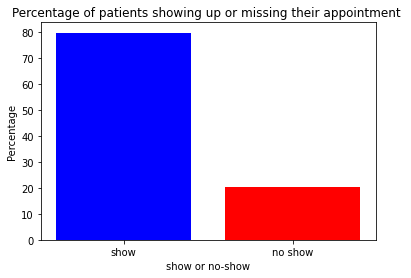

The number of patients who show up and no show up 
1    88208
0    22319
Name: show, dtype: int64


In [15]:
print("The percentage of patients who didin't show up for their appointment is: {}".format(1 - df["show"].mean()))
print("The percentage of patients who show up for their appointment is: {}".format(df["show"].mean()))
show = len(df[df["show"] == 1]) / len(df["show"])
no_show = len(df[df["show"] == 0]) / len(df["show"])
plt.bar(['show','no show'], [show * 100, no_show * 100], color = ['b', 'r'])
plt.title('Percentage of patients showing up or missing their appointment ')
plt.ylabel('Percentage')
plt.xlabel('show or no-show')
plt.show()
#display(df.groupby('show')[['show']].count())
print("The number of patients who show up and no show up \n{}".format(df["show"].value_counts()))

* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

create filters for show and no-show

In [16]:
show = df[df["show"] == 1]
no_show = df[df["show"] == 0]
total_miss = len(no_show)
total = len(show)

* Is the time gender related to whether a patient will show or not?

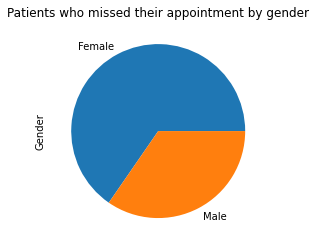

The percentage of female and male who didn´t show up for their appointment:
F    65.388234
M    34.611766
Name: gender, dtype: float64


In [17]:
female_no_show = len(no_show[no_show["gender"] == "F"]) 
male_no_show = len(no_show[no_show["gender"] == "M"])
label = ["Female", "Male"]
plt.pie([female_no_show, male_no_show], labels = label)
plt.ylabel("Gender")
plt.title("Patients who missed their appointment by gender")
plt.show()
print("The percentage of female and male who didn´t show up for their appointment:\n{}".format(no_show["gender"].value_counts() * 100 / total_miss))

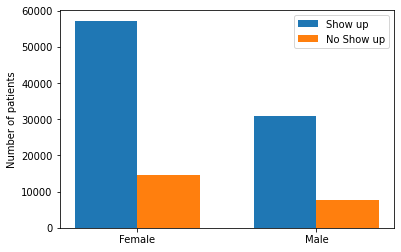

In [18]:
labels = ["Female", "Male"]
x = np.arange(len(labels)) 
width = 0.35
plt.bar(x - width / 2, show["gender"].value_counts(), width, label = "Show up")
plt.bar(x + width / 2, no_show["gender"].value_counts(), width, label = "No Show up")
plt.ylabel("Number of patients")
plt.xticks(x, labels)
plt.legend()
plt.show()

The percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.

* Are patients with scholarship more likely to miss their appointment?

define function to get the ratio of show in different categories

In [70]:
print("the percentage of patients missing their appointment by scholarship:\n{}".format(no_show["scholarship"].value_counts() / total_miss))
print("\nthe percentage of patients who didn't miss their appointment by scholarship:\n{}".format(show["scholarship"].value_counts() / total))

the percentage of patients missing their appointment by scholarship:
0    0.884493
1    0.115507
Name: scholarship, dtype: float64

the percentage of patients who didn't miss their appointment by scholarship:
0    0.906097
1    0.093903
Name: scholarship, dtype: float64


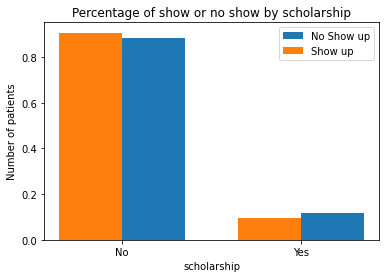

In [66]:
labels = ["No", "Yes"]
x = np.arange(len(labels)) 
width = 0.35
plt.bar(x + width / 2, (no_show["scholarship"].value_counts()) / total_miss, width, label = "No Show up")
plt.bar(x - width / 2, (show["scholarship"].value_counts()) / total, width, label = "Show up")
plt.ylabel("Number of patients")
plt.xticks(x, labels)
plt.xlabel("scholarship")
plt.title("Percentage of show or no show by scholarship")
plt.legend()
plt.show()

It seems that patients with scholarships are actually more likely to miss their appointment

* Are patients who don't recieve sms more likely to miss their appointment?

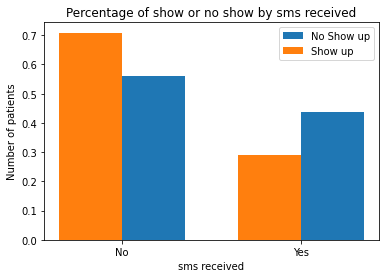

In [76]:
labels = ["No", "Yes"]
x = np.arange(len(labels)) 
width = 0.35
plt.bar(x + width / 2, (no_show["sms_received"].value_counts()) / total_miss, width, label = "No Show up")
plt.bar(x - width / 2, (show["sms_received"].value_counts()) / total, width, label = "Show up")
plt.ylabel("Number of patients")
plt.xticks(x, labels)
plt.xlabel("sms received")
plt.title("Percentage of show or no show by sms received")
plt.legend()
plt.show()

A strange finding here suggests that patients who received an SMS are more likely to miss their appointment and who didn't receive an SMS are more likely to show up to their appoinment!!

* Is the time difference between the scheduling and appointment related to whether a patient will show?

the propotion of different time difference for patients who missed their appiontments:


,day_diff2
more_than_15,38.460505
more_than_5,29.015637
fewdays,19.485640
sameday,13.015816


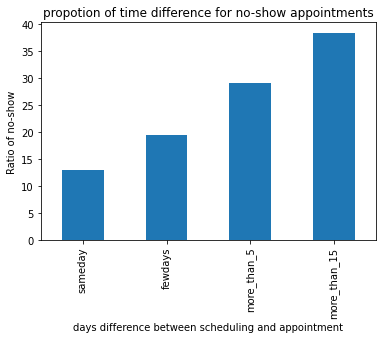

In [96]:
df1 = df[df["day_diff"] >= 0]
bin_edges = [-1, 1, 5, 15, 179]
names = ['sameday','fewdays','more_than_5','more_than_15']
df['day_diff2'] = pd.cut(df1["day_diff"], bin_edges, labels = names)

#no-show_day_diff=df[no-show].day_diff2.value_counts()/len(df[no-show])*100

no_show_day_diff = df[df["show"] == 0]["day_diff2"].value_counts() / len(no_show) * 100
no_show_day_diff.reindex(names).plot(kind = 'bar')
plt.title('propotion of time difference for no-show appointments')
plt.xlabel('days difference between scheduling and appointment')
plt.ylabel('Ratio of no-show')
print('the propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.

* Does age affect whether a patient will show up or not?

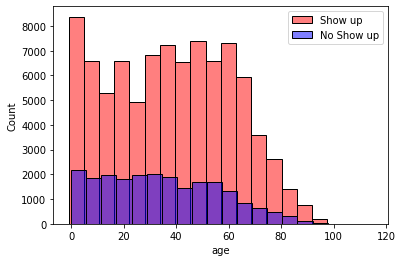

In [113]:
sns.histplot(show["age"], bins = 20, label = "Show up", color = "r", alpha = 0.5)
sns.histplot(no_show["age"], bins = 20, label = "No Show up", color = "b", alpha = 0.5)
plt.legend()

There is no clear relation between the age and whether the patient shows up or not but younger patients are more likely to miss their appointments.

* What is the percentage of patients missing their appointments for every neighbourhood

In [123]:
#get the number of records for each neighbourhood
rec_neigh = df["neighbourhood"].value_counts()
#get the number of records for patients missing their appointments for each neighbourhood
rec_neigh_no = no_show["neighbourhood"].value_counts()
#percentage of patients missing their appointments for every neighbourhood
rec_neigh_no_show_percentage = rec_neigh_no / rec_neigh
pd.DataFrame(rec_neigh_no_show_percentage.sort_values(axis = 0, ascending = False))

,neighbourhood
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÍLIA,0.274554
SANTA CLARA,0.264822
ITARARÉ,0.262664
...,...
SOLON BORGES,0.147122
MÁRIO CYPRESTE,0.145553
AEROPORTO,0.125000
ILHA DO BOI,0.085714


# Conclusions

After analyzing the dataset here are some findings:

* Percentage of patients who didn't show up for their appointment is 20.19%.
* The percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.
* It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.
* It seems that patients with scholarships are actually more likely to miss their appointment.
* A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !!
* There is no clear relation between the age and whether the patients show up or not but younger patients are more likely to miss their appointments.


Analysis Shortcoming & Data Limitations:

* The data doesn't state the exact hour of the appointment which would have been very useful to try to find out which hours have the most missing appointments and which doesn't. It could also be very useful to know the difference between scheduling and the appointment since many of the scheduling are on the same day.
* The data doesn't state if any day is a vacation or not which can indicate if people tend to miss their appointments more on working days.
* The age column had a negative value but according to the data creator, it means a baby not born yet (a pregnant woman).
* When calculating the day difference between the scheduling and appointment days we had some negative value which makes no sense and might mean that the records of questions have wrong data.